In [22]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from lungmask import mask, resunet, utils
import SimpleITK as sitk

In [31]:

path_image = r"H:\Datasets\figshare\covid_rate\COVID-Rate-CT\p007\p07im004.dcm"

path_path_image = Path(path_image)

sitk_image_input = sitk.ReadImage(path_image)

# Stuff about the image metadata stuff...
# print(sitk_image_input.GetMetaDataKeys())
# print(sitk_image_input)

dict_k_tuple_model_name_v_url = mask.model_urls

for tuple_model_name, url in dict_k_tuple_model_name_v_url.items():
    print(f"{tuple_model_name}\n{url}\n")


('unet', 'R231')
('https://github.com/JoHof/lungmask/releases/download/v0.0/unet_r231-d5d2fc3d.pth', 3)

('unet', 'LTRCLobes')
('https://github.com/JoHof/lungmask/releases/download/v0.0/unet_ltrclobes-3a07043d.pth', 6)

('unet', 'R231CovidWeb')
('https://github.com/JoHof/lungmask/releases/download/v0.0/unet_r231covid-0de78a7e.pth', 3)



In [3]:
# model = mask.get_model('unet','LTRCLobes')

dict_k_tuple_model_name_v_model = {key: mask.get_model(*key) for key, value in dict_k_tuple_model_name_v_url.items()}

In [4]:
dict_k_tuple_model_name_v_segmentation = {}

for tuple_model_name, model in dict_k_tuple_model_name_v_model.items():
    dict_k_tuple_model_name_v_segmentation[tuple_model_name] = mask.apply(sitk_image_input, model)  # default model is U-net(R231)


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 2997.36it/s]


In [5]:
np_image_input = sitk.GetArrayFromImage(sitk_image_input)[0]

In [6]:
# sitk.Show(input_image)

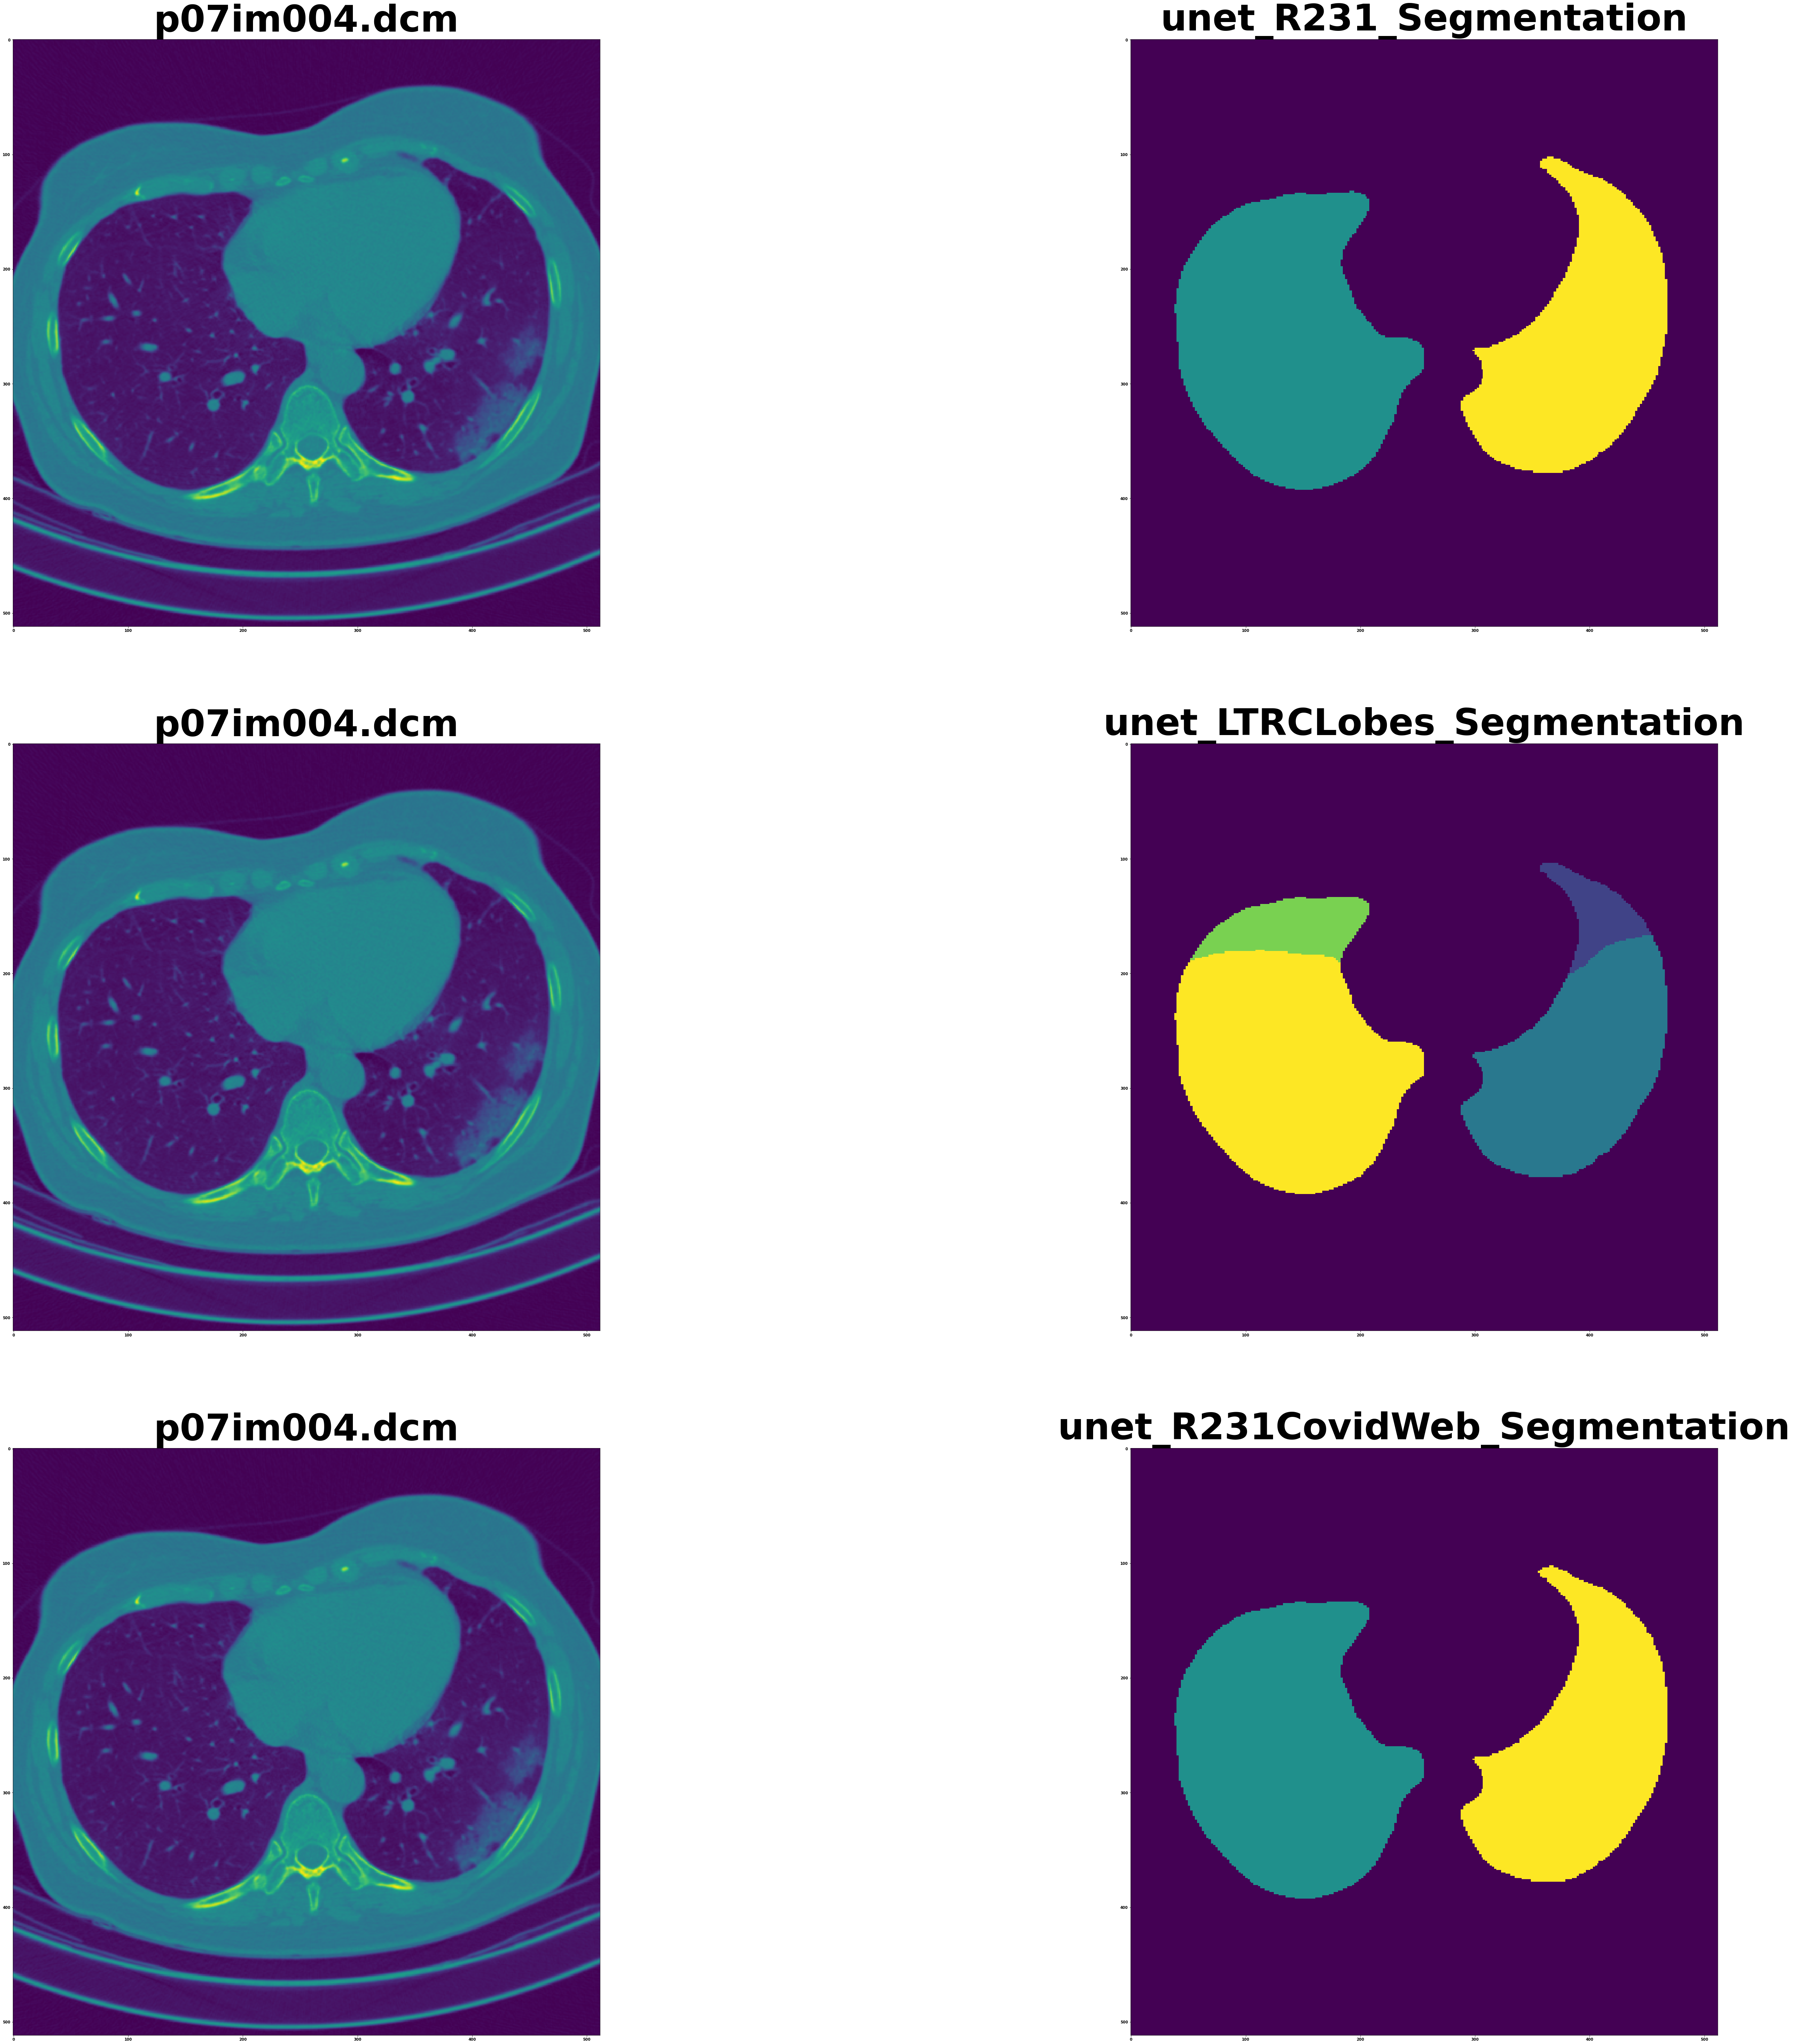

In [28]:
# f, axs = plt.subplots(2,2,figsize=(15,15))

fig, axes = plt.subplots(len(dict_k_tuple_model_name_v_segmentation), 2)
fig.set_size_inches(100, 100)

np_color_map_common = plt.get_cmap("viridis")
FONT_SIZE = 100

for index, (tuple_model_name, segmentation) in enumerate(dict_k_tuple_model_name_v_segmentation.items()):

    ax_current = axes[index]

    ax_current[0].set_title(path_path_image.name, fontsize=FONT_SIZE)
    ax_current[0].imshow(np_image_input, cmap=np_color_map_common)

    ax_current[1].set_title("_".join((*tuple_model_name, "Segmentation")), fontsize=FONT_SIZE)
    ax_current[1].imshow(segmentation[0], cmap=np_color_map_common)